# Understanding Loss Functions

*The goal here is to understand:*

1. Hinge Loss Function
2. Squared Hinge Loss Function
3. Softmax/Cross Entropy Loss Function

The purpose of the loss function is to quantify the goodness/badness of the values/outputs of the scoring function.  As a review, the scoring function takes a data-point (image) as an input and outputs a single value per **label** of the dataset (multiple values per image/data-point).  For example, if we had 3 labels:

                                            [ dog, cat, panda ] 

and we fed the scoring function a single image, we would retrieve 3 prediction values.

                IMAGE ---> [SCORING FUNCTION]  ---> dog prediction = 2.03
                                               ---> cat prediction = 1.02
                                               ---> panda prediction = 30.25


We now need a way to quantify the goodness/badness of these prediction values and derive meaning from these prediction values.  The loss function takes these values (the outputs of the scoring function) as it's inputs.  The loss function then outputs a single value for each of the images fed through the scoring function.  

Averaging the loss function values for all data-point/images fed through the scoring function gives the final loss function value.  Now that we get the general idea of a "loss function", let's look at a few different kind of loss functions.

First, let's take on the **Hinge Loss Function**, defined below:

# Hinge Loss Function
<img src="images/Hinge_Loss_Function.png">

To explore the Hinge Loss function we create a table of fake scoring function values.  *Remember, the inputs to the loss function are the scoring function values.*

|.    |IMAGE1|IMAGE2|IMAGE3|
|-----|------|------|------|
|DOG  |4.26  |3.76  |-2.37 |
|-----|------|------|------|
|CAT  |1.33  |-1.20 |1.03  |
|-----|------|------|------|
|PANDA|-1.01 |-3.81 |-2.27 |

In [129]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Let's assume image 1 is a dog, image 2 is a cat, and image 3 is a panda.
# Our Hinge Loss function formula can be re-stated in plain english to be as follows
#
#   For each image/data-point that moves through the scoring function:
#
#   1. Take each scoring function value associated with the wrong label and subtract it from the scoring function
#      value associated with the correct label
#   2. Add 1 to this value and make sure the value is clamped above 0
#   3. Add the values for each wrong label up to get a loss function value for that particular image/data-point
#
# After all images/data-points have been given a loss value, take the average of all loss values as the total loss 
# function value for the dataset.

# Now let's apply the Hinge Loss Function to the example images in the above table

img1_loss_value = max(0,1.33-4.26+1) + max(0,-1.01-4.26+1)
print(img1_loss_value)
img2_loss_value = max(0,3.76--1.20+1) + max(0,-3.81--1.20+1)
print(img2_loss_value)
img3_loss_value = max(0,-2.37--2.27+1) + max(0,1.03--2.27+1)
print(img3_loss_value)

0
5.96
5.199999999999999


### What do these numbers mean?

Notice that we said the first image was a dog.  Also notice that the scoring function values for this image (the table) provided the highest value for the label "dog".  *Effectively this means, the classifier guessed correctly for the first image.*

Also, the first image loss value was calculated to be 0.  **The other images were not guessed correctly and have non-zero loss values.**  This is a rule of the Hinge Loss Function:

* **A loss value of 0 means the correct label was applied to the image/data-point**

### Hence a common refrain in ML - "The Goal is to Minimize the Loss Function!"

In [130]:
# Finding the total loss function value by averaging all loss values
h_loss_function_value = (img1_loss_value+img2_loss_value+img3_loss_value)/3
print(h_loss_function_value)

3.72


### Interpreting the total loss function value

The total loss function value always represents a way to quantify the goodness/badness of our scoring function values.  In other words, a judgement about the predictions our scoring function made on each image.

Just as important is to understand that the total loss function value is completely dependent on the particular values of the Weights Matrix and the Bias Vector.  Some combination of specific Weight Matrix values and some combination of specific Bias Vector values caused the scoring function to output the values we found in our table for each image.  If we were to change any number in the Weight Matrix or any number in the Bias Matrix, **the scoring function values would change.  By proxy, the final loss function value would change too.**

### This is a huge and fundamental foundation to ML.

1. Changing the Weigths Matrix or Bias Vector Values provides different scoring function outputs
2. By proxy this also changes the total loss function value since the scoring function outputs **ARE** the loss function inputs
3. **Therefore, our goal becomes to adjust the Weights Matrix numbers and Bias Vector numbers to achieve scoring function outputs such that our loss function moves towards 0.**

# What does the Hinge Loss Function Look Like?

To develop an intuitive sense of how loss functions effect scoring function values, it is helpful to visualize.

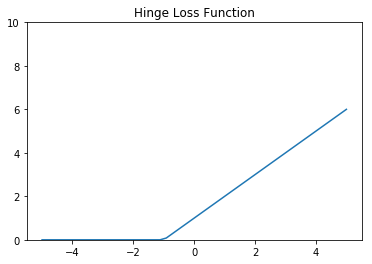

In [131]:
# Here we create 50 values between -5 and 5 for X (arbitrarily chosen).  
# We then feed each of these X values into the Hinge function to retrieve a corresponding Y value
#
# The plot of Hinge Loss Function is then displayed

x = np.linspace(-5,5,50)
y = []
for each in x:
    y.append(max(0,each+1))
plt.plot(x,y)
plt.ylim((0,10))
plt.title('Hinge Loss Function')
plt.show()

Don't let the syntax of the Hinge loss function above confuse you: (max(0,each-1)).

The variable "each" represents *sj-syi* for each image/data-point.  Or, in other words, the sum of the difference between the socring function for the true label of the data-point/image (syi) and the wrong labels for the data-point/image.

We also see that the loss function value is increased linearly the further our scoring function values are from the correctly labeled scoring function value. 

After visualizing the loss function, we see that no penalty is actually applied until our scoring function derives a value greater than 1 - Show later?

# Squared Hinge Loss Function

The Squared Hinge loss function is very similar to the Hinge Loss Function.
<img src="images/Hinge_Square_Loss_Function.png">
If we use our same scoring function values to calculate the total loss function value using the Squared Hinge loss function we get...


In [132]:
# Calculate Squared Hinge Loss function value
sq_h_loss_function_value = ((img1_loss_value)**2+(img2_loss_value)**2+(img3_loss_value)**2)/3
print(sq_h_loss_function_value)

20.853866666666665


## Main Difference B/N Hinge Loss Function and Squared Hinge Loss Function

We get a much larger number for the Squared Hinge loss function value.  

If we remember that the goal of our classifier is to minimize the loss function, what is this telling us about the Squared Hinge loss function?  

It says that, for the exact same scoring function output values, the Squared Hinge loss function says our classifier is worse than the Hinge loss function.  In other words, the Squared Hinge loss function penallizes wrong guesses from the scoring function more than the Hinge loss function.   

If you really think about what's happening.  For each image, each of the loss function values is squared before being sumed.  This leads to quadratic growth in the total loss function value (opposed to linear growth from the Hinge loss fuction).

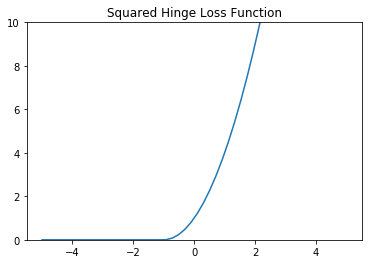

In [133]:
# Here we create 50 values between -5 and 5 for X (arbitrarily chosen).  
# We then feed each of these X values into the Squared Hinge function to retrieve a corresponding Y value
#
# The plot of Squared Hinge Loss Function is then displayed

x = np.linspace(-5,5,50)
y = []
for each in x:
    y.append(max(0,each+1)**2)
plt.plot(x,y)
plt.ylim((0,10))
plt.title('Squared Hinge Loss Function')
plt.show()

Comparing this graph to the Hinge Loss graph, we see this graph grows exponentially.  This visually shows the point made earlier about the Squared Hinge Loss function penalizing inappropriate scoring values much steeper than the Hinge loss function.

# SoftMax/Cross Entropy Loss Function

Unlike the Hinge and Squared Hinge loss function, the SoftMax/Cross Entropy loss function allows us to quantify the loss function in terms of probabilities (a more intuitive approach).

<img src="images/Cross_Entropy_Loss_Function.png">

Let's pretend our scoring function gave us the following values for the image of a Panda.  We'll use these to calculate the Cross Entropy loss function value.

|SCORING FUNCTION|.     |
|----------------|------|
|DOG             |-3.44 |
|----------------|------|
|CAT             |1.16  |
|----------------|------|
|PANDA           |3.91  |

In [134]:
# Finding the Cross Entropy loss function inclues the following steps in plain english

# 1. For each scoring function value, raise e to that power
# 2. Sum all of these values
# 3. Divide each e raised to the power of the scoring function value, by the sum of these values
# 4. Take the -ln() of each of these values

# First we raise e to the power of each scoring function value to get the "unnormalized probability"
e_d_score_func_val = np.exp(-3.44)
e_c_score_func_val = np.exp(1.16)
e_p_score_func_val = np.exp(3.91)
print(e_d_score_func_val)
print(e_c_score_func_val)
print(e_p_score_func_val)

0.03206468532786077
3.1899332761161845
49.89895197340787


In [135]:
# Now we sum these values (the denominator of function 8.13)
e_scoring_func_sum = e_d_score_func_val+e_c_score_func_val+e_p_score_func_val
print(e_scoring_func_sum)

53.120949934851915


In [136]:
# Next we find the "normalized probability" for each label by dividing the labels scoring function value with the 
# previously found sum.  The value calculated fromt the panda socring function value here represents that the
# classifier is a 93.93% confident the image is a Panda.

d_ce_loss_func_val = e_d_score_func_val/e_scoring_func_sum
c_ce_loss_func_val = e_c_score_func_val/e_scoring_func_sum
p_ce_loss_func_val = e_p_score_func_val/e_scoring_func_sum
print(d_ce_loss_func_val)
print(c_ce_loss_func_val)
print(p_ce_loss_func_val)

0.0006036165649745578
0.06005038087662875
0.9393460025583967


In [137]:
# Finally we take the -log() of each normalized probability
d_final_loss_value = -math.log(d_ce_loss_func_val)
c_final_loss_value = -math.log(c_ce_loss_func_val)
p_final_loss_value = -math.log(p_ce_loss_func_val)

print(d_final_loss_value)
print(c_final_loss_value)
print(p_final_loss_value)

7.412571387817995
2.812571387817995
0.06257138781799491


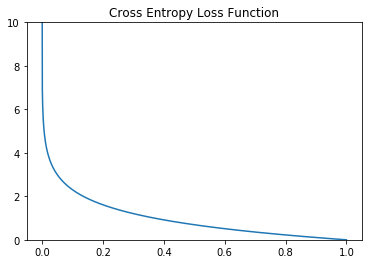

In [138]:
# Here we create 1000 values between effectively 0 and 1 for X (arbitrarily chosen).  
# We then feed each of these X values into the a function of the same form as Cross Entropy
# loss and retrieve a corresponding Y value
#
# The plot of Cross Entropy Loss Function is then displayed

x = np.linspace(0.000001,1,1000)
y = []
for each in x:
    y.append(-math.log(each))
plt.plot(x,y)
plt.ylim((0,10))
plt.title('Cross Entropy Loss Function')
plt.show()

What conclusions can be drawn?